<a href="https://colab.research.google.com/github/pedroAndrad1/validacao_de_modelos/blob/master/Machine_Learning_Otimizac%CC%A7a%CC%83o_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [0]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [0]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


In [0]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [0]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [0]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [0]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [0]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


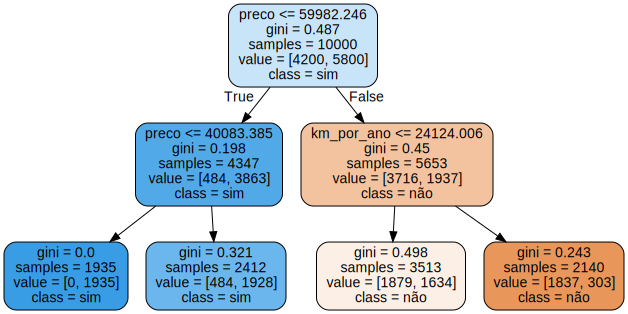

In [0]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [0]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


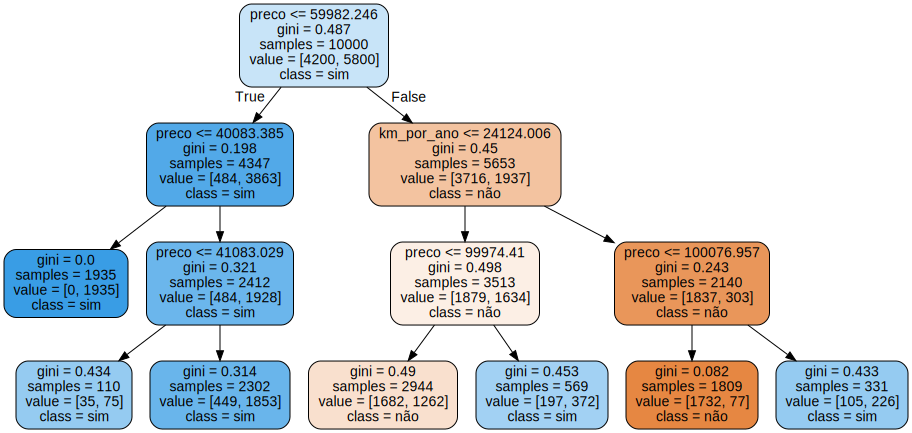

In [0]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [0]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Explorando uma dimensão de parâmetros



> Aqui exploraremos o hiperparâmetro max_depth. Vamos testar varíos valores diferentes para encontrar um que faça nosso modelo ser mais eficiente.



In [0]:
#Esta funcao recebe um max_depth como parametro, cria uma tree classifier com
#o max_depth passado por parametro e faz um cross validation com k = 10 usando
#o GroupKFold. Lembrando que estamos usando x e y que reoordenados por nos anteriormente.
#A funcao retorna uma tabela com a media das acuracias no teste e treino no cross validation,
#ambas vezes 100. Alem de retornar tambem o max_depth usado, tudo em um array.


def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela
  
#Vamos ver esses resultados rodando com o max_depth variando de 1 a 32, num for.  
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
#Por fim, vou plotar um dataframe pra vermos melhor quais foram as accuracy's mais
#altas no testes relacionadas aos seus respectivos max_depth's.
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.sort_values("test", ascending = False).head()

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


Plotando a curva entre a accuracy de treino em relação ao max_depth.

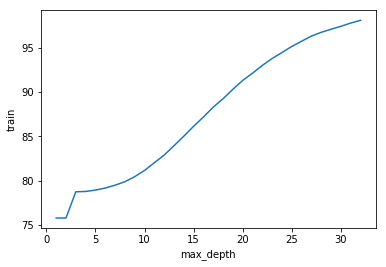

In [0]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)

# OVERFIT: ficou "perfeito" para o treino mas ruim para o teste



> Podemos ver no gráfico abaixo que quanto maior a nossa max_depth a partir de certo ponto, menor é accuracy de teste e maior a de treino. Isso caracteriza um overfit, ou seja, a árvore se adequou tanto as features que está apenas descrevendo-as, sendo incapaz de generalizar para novos sample's.





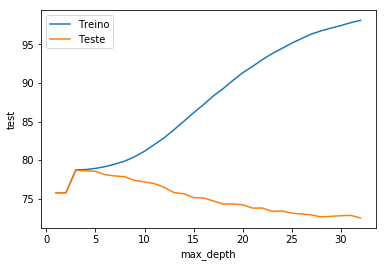

In [0]:
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

#Explorando hiperparâmetros em duas dimensões. 



> Agora ao invés de analisar apenas o max_depth, vou também analisar o min_samples_leaf, que é o parâmetro que dita qual o mínimo de sample's que uma folha pode ter. 


> Aqui já nos deparamos com um problema. Percebe-se que já demorou um pouco o processe apenas analisando o max_depth, agora imagine fazer este mesmo processo para cada max_depth correlacionado para cada min_sample_leaf , sendo que esses min's normalmente chegam na casa dos milhares. Vai demorar muito. Então tenho duas soluções para isso: imaginando isso num gráfico, posso fazer máquinas diferentes rodarem para intervalos distintos deste gráfico e depois juntar tudo, ou seja, paralelizar o processo. Claro que eu poderia deixar rodando tudo em um máquina só mesmo durante muito tempo e ir dar um rolê, mas essa não será uma das opções aqui.

> Porém, eu não tenho outras máquinas para fazer isso. Então, usarei a segunda opção que é selecionar valores arbitrários de min_samples_leaf's para correlacionar com todos os max_depth's.

docs:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier







In [0]:
#Vou fazer umas modificacoes na funcao anterior para adicioanar o min_sample_leaf
#na historia.

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

resultados = []
for max_depth in range(1,33):
  for min_samples_leaf in [32, 64, 128, 256]:
    resultados.append(roda_arvore_de_decisao(max_depth, min_samples_leaf))
    
resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
resultados.sort_values("test", ascending = False).head()

Arvore max_depth = 1, min_samples_leaf = 32 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 64 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 128 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 32 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 64 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256 treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 32 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256 treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 32 treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_sample

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


#Estudando as correlações



> Só olhando esse dataframe é díficil entender as relações entra os hiperparâmetros e a accuracy de teste. Vamos usar duas formas de estudar isso, a primeira será uma técnica da estástica que é chamada de matriz de correlação , o pandas disponibiliza esta com a função corr(), e a segunda forma será uma representação gráfica da matriz de correlação, mais precisamento um plot de uma diagonal correlation matrix, usando a função heatmap do seaborn.

docs:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://seaborn.pydata.org/examples/many_pairwise_correlations.html



In [0]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,0.000000,0.536705,-0.027675
min_samples_leaf,0.000000,1.000000,-0.409676,0.349011
train,0.536705,-0.409676,1.000000,0.116466
test,-0.027675,0.349011,0.116466,1.000000


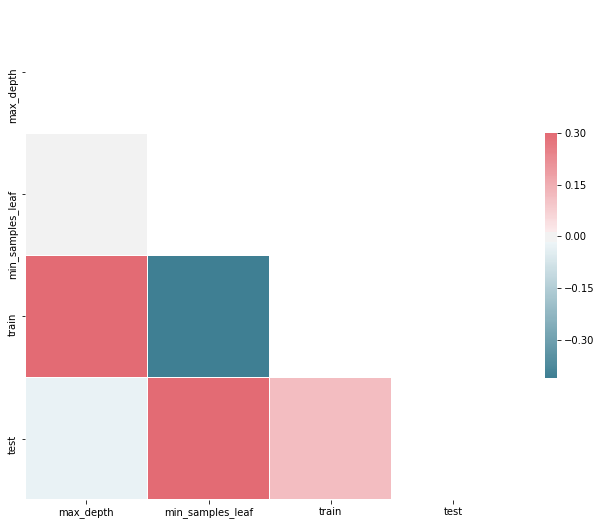

In [0]:
#Copie esse codigo da documentacao do seaborn, terceiro link no text acima.

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Da pra ver que está acontecendo uma relação diretament proporcional entre o test e os valores escolhidos para min_samples_leaf. Isso indica é uma boa otimização está naquele intervalo. 
Mas também mostra que a relação do max_depth e test está praticamente nula, então seria bom alterar um pouco o intervalo dos valores atrás de uma mudança.

LEMBRANDO QUE ISSO NÃO GARANTE QUE IREMOS ACHAR A MELHOR OTIMIZAÇÃO, MAS NOS GARANTE UMA EXPLORAÇÃO ATRÁS DE UMA BOA.

#Explorando N dimensões de hiperparâmetros com o GridSearchCV (grid search cross validation)



> Já deu pra perceber que quantos mais hiperparâmetros no estudo, maior é o problema. Então vamos usar uma biblioteca que resolve isso para nós, o SKlearn tem uma classe chamada GridSearchCv que tem esse propósito.

docs:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [0]:
from sklearn.model_selection import GridSearchCV

#Vou fazer um dicionario para passar os hiperparametros que quero testar e seus
#respectivos possiveis valores. Vou continuar escolhendo arbitrariamente e dessa
#vez vou fazer isso no max_depth tambem. Vou ate adicionar mais dois hiperparametros,
#o min_samples_split e o criterion.

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
       "max_depth": [3,5],
       "min_samples_leaf": [32, 64, 128, 256],
       "min_samples_split": [32, 64, 128, 256],
       "criterion": ["gini", "entropy"]
}

busca = GridSearchCV( DecisionTreeClassifier(), espaco_de_parametros, 
                      cv = GroupKFold( n_splits = 10) )

O GridSearchCV tem várias funções e atributos muito úteis: 

In [0]:
#Fazendo o processo de cross validation

busca.fit(x_azar, y_azar, groups = dados.modelo)

#Vendo os resultados do cross validation.

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011912,0.001905,0.001443,0.000133,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
1,0.011173,0.000354,0.001421,0.000119,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
2,0.011012,0.000228,0.001381,0.000101,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
3,0.011165,0.000301,0.001364,0.000038,gini,3,32,256,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
4,0.011158,0.000248,0.001381,0.000083,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1


Mas complicado ir atrás dos melheros hiperparâmetros nesse dataframe, certo? Por isso o GridSearchCV já tem um atributo com esses valores

In [0]:
print(busca.best_params_)

#Tem a melhor acuracia tambem

print(busca.best_score_ * 100) 

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.68


Além disso, ele também tem um atributo com o melhor modelo

In [0]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#Avaliando o melhor modelo.



> Para avaliarmos este modelo, não adianta só fazermos um cross validation deste modelo. Isso é chamado de non-nested e implica num vício deste modelo nas features, levando a um resultado que não reflete a realidade.

> Logo, devemos fazer um nested cross validation, que é fazer um cross validation no GridSearcCV em si. 



> OBS: Aqui existe um bug, fazendo o nested cross validation usando o GroupsKFold, há um bug no qual os groups passados por parâmetro são dados como NONE. Então vou recriar o grid usando o KFold pra poder fazer a nested cross validation. 

Docs que exemplifica a situação: nested cross validation vs non-nested cross validation

https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

Discussão sobre o bug:

https://github.com/scikit-learn/scikit-learn/issues/7646







In [0]:
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
       "max_depth": [3,5],
       "min_samples_leaf": [32, 64, 128, 256],
       "min_samples_split": [32, 64, 128, 256],
       "criterion": ["gini", "entropy"]
}

busca = GridSearchCV( DecisionTreeClassifier(), espaco_de_parametros, 
                      cv = KFold( n_splits = 10, shuffle = True) )

Fazendo a nested cross validation usando a função cross_val_score, porque só quero o score mesmo.

docs:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [0]:
#logica para imprimir o intervalo e media a partir dos scores
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 10, shuffle = True) )
print(scores)

#imprimindo intervalo e accuracy medio
imprime_score(scores)

[0.787 0.796 0.77  0.793 0.789 0.791 0.786 0.796 0.782 0.778]
Accuracy médio 78.68
Intervalo [77.11, 80.25]


De quebra, vou plotar a árvore de decisão do melhor modelo

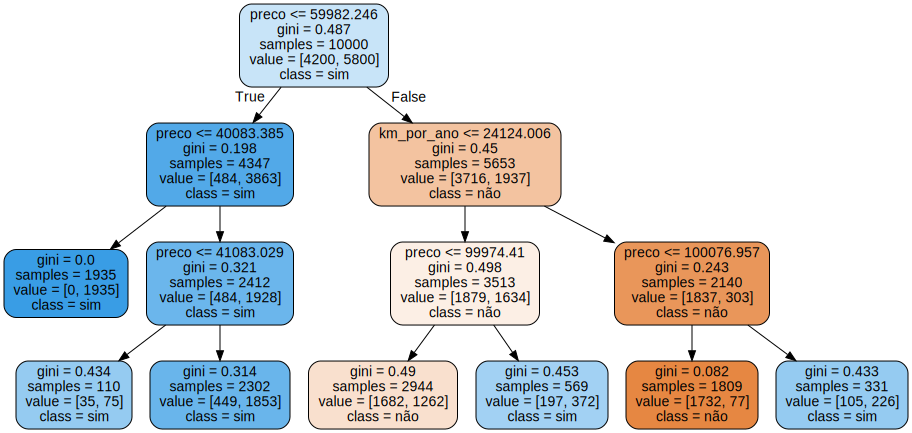

In [55]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph